[ADS Entry](http://adsabs.harvard.edu/abs/1999MNRAS.303L...1B)

In [73]:
import sympy
sympy.init_printing()

Equation 1

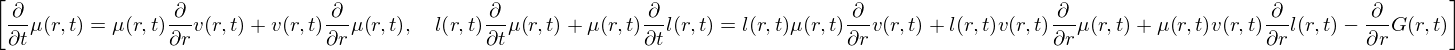

In [74]:
mu = sympy.Symbol('mu') # Mass per unit radius
v = sympy.Symbol('v') # Radial velocity
t = sympy.Symbol('t') # Time
r = sympy.Symbol('r') # Radius
G = sympy.Symbol('G') # Torque
l = sympy.Symbol('l') # Specific angular momentum
eqn_1 = [sympy.Eq(mu(r,t).diff(t),(mu(r,t)*v(r,t)).diff(r)),
        sympy.Eq((mu(r,t)*l(r,t)).diff(t),(mu(r,t)*v(r,t)*l(r,t)).diff(r)-G(r,t).diff(r))]
eqn_1

Equation 2

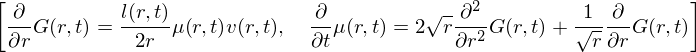

In [75]:
eqn_2 = [sympy.Eq(G(r,t).diff(r),mu(r,t)*v(r,t)*l(r,t)/(2*r)),
        sympy.Eq(mu(r,t).diff(t),2*(sympy.sqrt(r)*G(r,t).diff(r)).diff(r))]
eqn_2

Verification of equation 2

In [76]:
_ = eqn_2[:]
_ = [itm.subs(sympy.solve(eqn_1,[mu(r,t).diff(t),G(r,t).diff(r)])) for itm in _]
_ = [itm.subs(l(r,t),sympy.sqrt(r)) for itm in _]
_ = [itm.simplify() for itm in _]
_ = [itm.doit() for itm in _]
assert(_[0])
assert(_[1].simplify())

Equation 3

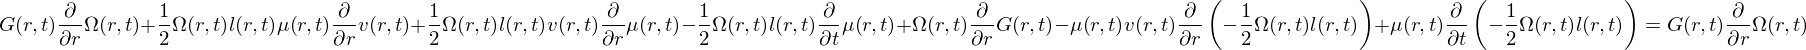

In [77]:
e = sympy.Symbol('e') # Energy per unit mass
Omega = sympy.Symbol('Omega') # Angular velocity
eqn_3 = sympy.Eq((mu(r,t)*e(r,t)).diff(t)+(Omega(r,t)*G(r,t)-mu(r,t)*v(r,t)*e(r,t)).diff(r),
                G(r,t)*Omega(r,t).diff(r)).subs(e(r,t),-Omega(r,t)*l(r,t)/2)
eqn_3

Verification of equation 3

In [81]:
_ = eqn_3
_ = _.subs(sympy.solve(eqn_1,[mu(r,t).diff(t),G(r,t).diff(r)]))
_ = _.subs(Omega(r,t),1/r**sympy.Rational(3,2))
_ = _.subs(l(r,t),sympy.sqrt(r))
_ = _.doit()
_ = _.simplify()
assert(_)

Equation 4

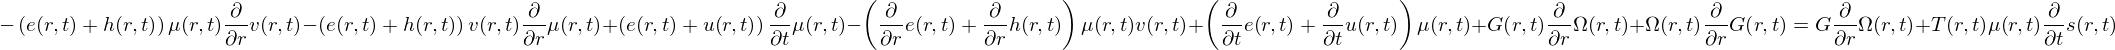

In [141]:
u = sympy.Symbol('u') # Thermal energy density
h = sympy.Symbol('h') # Specific enthalpy
T = sympy.Symbol('T') # Temperature
s = sympy.Symbol('s') # Specific entropy
sympy.Eq((mu(r,t)*(e(r,t)+u(r,t))).diff(t)+
        (Omega(r,t)*G(r,t)-mu(r,t)*v(r,t)*(e(r,t)+h(r,t))).diff(r),
        G*Omega(r,t).diff(r)+
        mu(r,t)*T(r,t)*s(r,t).diff(t))

Equation 6

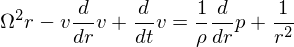

In [86]:
rho = sympy.Symbol('rho') # Mass density
p = sympy.Symbol('p') # Pressure
eqn_6 = sympy.Eq(sympy.Derivative(v,t)-v*sympy.Derivative(v,r)+Omega**2*r,
                1/r**2+sympy.Derivative(p,r)/rho)
eqn_6

Poitive $v$ is moving toward decreasing r!

Equation 7

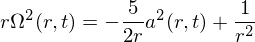

In [164]:
_ = eqn_6
_ = _.subs(v,0)
_ = _.subs(sympy.Derivative(p,r),-5*p/(2*r))
_ = _.subs(p,rho*a**2)
_ = _.doit()
_ = _.subs(a,a(r,t))
_ = _.subs(Omega,Omega(r,t))
eqn_7 = _
eqn_7

Equation 8

In [94]:
dot_m = sympy.Symbol(r'\dot{m}') # Mass acrretion rate
eqn_8 = sympy.Eq(mu(r,t)*v(r,t),dot_m)
eqn_8

verification of equation 8

In [107]:
_ = sympy.Eq(eqn_8.lhs.diff(r),
             eqn_8.rhs.diff(r))
_ = _.subs(sympy.solve(eqn_1[0].subs(mu(r,t).diff(t),0),mu(r,t).diff(r),dict=True)[0])
assert(_)

Equation 9

In [110]:
F_l = sympy.Symbol('F_l') # Constant of integration
eqn_9 = sympy.Eq(dot_m*r**2*Omega(r,t)-G(r,t),F_l)
eqn_9

verification of equation 9

In [124]:
_ = sympy.Eq(eqn_9.lhs.diff(r),
             eqn_9.rhs.diff(r))
_ = _.subs(sympy.solve(eqn_1[1],G(r,t).diff(r),dict=True)[0])
_ = _.subs(l(r,t),sympy.sqrt(r))
_ = _.subs(sympy.solve(eqn_8,mu(r,t),dict=True)[0])
_ = _.subs(Omega(r,t),r**sympy.Rational(-3,2))
_ = _.doit()
_ = _.subs(v(r,t).diff(t),0)
assert(_)

Equation 10

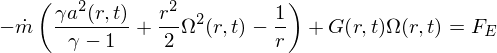

In [148]:
gamma = sympy.Symbol('gamma') # Adiabatic index
a = sympy.Symbol('a') # Isothermal speed of sound
F_E = sympy.Symbol('F_E') # Integration constant
eqn_10 = sympy.Eq(G(r,t)*Omega(r,t)-dot_m*(Omega(r,t)**2*r**2/2-1/r+gamma*a(r,t)**2/(gamma-1)),
                 F_E)
eqn_10

This is simply the second term in the left hand side of equation 4, since the right hand side vanishes.

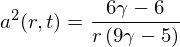

In [194]:
_ = [eqn_7,eqn_9,eqn_10]
_ = [itm.subs(F_l,0) for itm in _]
_ = [itm.subs(F_E,0) for itm in _]
_ = [itm.subs(sympy.solve(_[1],G(r,t),dict=True)[0])
     for itm in _]
_ = [itm.subs(sympy.solve(_[0],Omega(r,t),dict=True)[0])
     for itm in _]
_ = sympy.solve(_[2],a(r,t)**2)[0].simplify()
eqn_11 = sympy.Eq(a(r,t)**2,_)
eqn_11